## Creating the Scheduling Table

### Check if configuration has been run already and change directory to repository root:

In [1]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()

Local configuration file found !!, no need to run the configuration (unless configuration has changed)


In [2]:
import datajoint as dj
import u19_pipeline.utility as utility

dj.__version__

'0.14.3'

In [3]:
db_name = 'u19_'
connect_mod = lambda x: dj.VirtualModule(x, db_name + x)
lab = connect_mod('lab')
subject = connect_mod('subject')
# scheduler = connect_mod('scheduler ')
# lab = dj.VirtualModule('lab', db_name + 'lab')
# lab = dj.VirtualModule('lab', db_name + 'lab')

[2024-10-01 21:56:32,115][INFO]: Connecting ct5868@datajoint00.pni.princeton.edu:3306
[2024-10-01 21:56:33,291][INFO]: Connected ct5868@datajoint00.pni.princeton.edu:3306


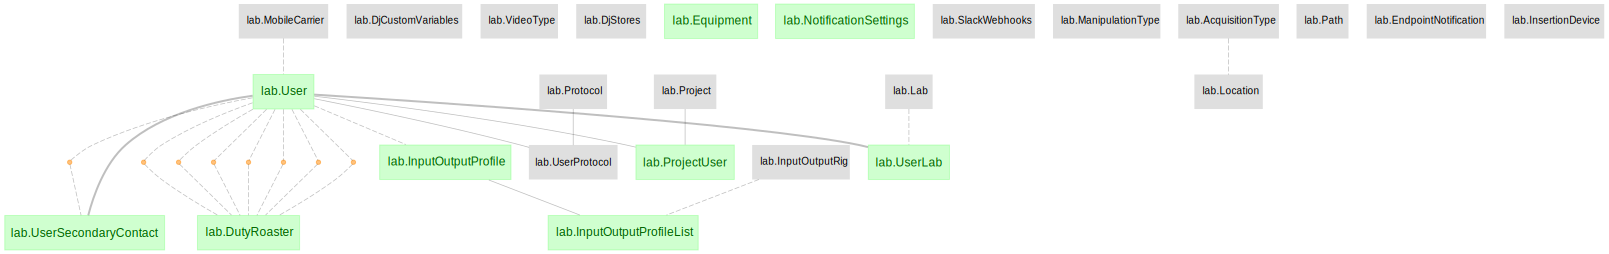

In [4]:
# lab.Location()
# import u19_pipeline.scheduler
dj.Diagram(lab)

In [5]:
from u19_pipeline import scheduler
# scheduler = connect_mod('scheduler')


In [6]:
# scheduler.BehaviorProfile.drop()
# scheduler.RecordingProfile.drop()

In [7]:
behavior_dict = {
    'user_id': 'testuser',
    'date_created': '2024-10-01',
    'behavior_profile_name': 'TestUserBehavior1',
    'behavior_profile_description': 'This is a sample profile description.',
    'behavior_profile_variables': {'nested_key': 'nested_value'}  # Example binary data
}

In [8]:
scheduler.BehaviorProfile.insert1(behavior_dict)

In [9]:

scheduler.RecordingProfile.heading

# 
profile_id           : intauto_increment            # 
---
user_id              : varchar(32)                  # username
date_created         : date                         # 
recording_profile_name : varchar(255)                 # Profile name
recording_profile_description : varchar(255)                 # Profile description
recording_profile_variables : longblob                     # Encoded for the variables

In [12]:

recording_dict = {
    'user_id': 'testuser',
    'date_created': '2024-10-01',
    'recording_profile_name': 'TestUserRecording1',
    'recording_profile_description': 'This is a sample profile description.',
    'recording_profile_variables': {'nested_key': 'nested_value'}  # Example binary data
}

In [13]:

scheduler.RecordingProfile.insert1(recording_dict)